<a href="https://colab.research.google.com/github/GabrielleRab/SRMPmachine/blob/main/Decision_Trees_Dragonflies_sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Dragonfly wings with Decision Trees**

### **Step 1:** Identify your question

In this colab, you will build a machine learning model to figure out which characteristics of a dragonfly's wing are best correlated with its sex.

### **Step 2:** Select your data

## ***Add description of data and column names***

Let's load the data into the colab and take a look. Run the cell below to create a dataframe (table) of our data and preview the first five rows:

In [ ]:
# import the necessary Python libraries
import pandas as pd

# create a dataframe called "df" with the dataset
df = pd.read_csv("https://raw.githubusercontent.com/GabrielleRab/SRMPmachine/main/datasets/wing_measurements.csv")

# preview the first five rows
df.head()

,Collection Unique ID,Suborder,Family,Genus,Species,Species name,Sex,Wing Side,Area FW (mm2),Area HW (mm2),...,Width (outer) HW (mm),Widest ratio FW,Widest ratio HW,Slope of thickness FW,Slope of thickness HW,Apex ratio FW,Apex ratio HW,Tip angle FW (°),Tip angle HW (°),Scale calib factor (px/mm)
0,36572,Anisoptera,Aeshnidae,Aeshna,canadensis,Aeshna canadensis,F,right,373.376,491.105,...,15.431,0.556762,0.289720,0.012417,-0.121772,0.592727,0.640604,117.457148,109.273755,47.244
1,40718,Anisoptera,Aeshnidae,Aeshna,canadensis,Aeshna canadensis,F,right,427.353,545.907,...,15.812,0.511051,0.271583,0.008964,-0.105335,0.581911,0.631861,113.887191,105.261849,47.244
2,39652,Anisoptera,Aeshnidae,Aeshna,canadensis,Aeshna canadensis,F,right,356.478,493.993,...,15.494,0.615949,0.305995,0.066308,-0.077950,0.600000,0.658470,120.962536,109.693890,47.244
3,RU-N:WL:OdoD: 2017 00208,Anisoptera,Aeshnidae,Aeshna,canadensis,Aeshna canadensis,F,right,360.092,471.772,...,15.177,0.622098,0.302613,0.055618,-0.054726,0.565558,0.599721,119.703030,112.428416,47.244
4,RU-N:WL:OdoD: 2017 00209,Anisoptera,Aeshnidae,Aeshna,canadensis,Aeshna canadensis,F,right,375.965,472.819,...,14.880,0.600734,0.292293,0.045708,-0.059991,0.573896,0.617354,119.434881,111.368972,47.244


The "discoverymethod" column contains the labels for this dataset. It tells us in advance which detection method was used for each exoplanet.

##THIS LABEL IS NOT VISIBLE TO ME - SAFI. I believe this is leftover from exoplanets and need to be sex instead here?

Suggested text: We are trying the sex of new dragonfly specimen that we may find. In our training data, the "sex" column contains labels for the sex for this dataset. This makes this dataset a "labelled" dataset with pre-existing "sex" labels for existing dragonfly wings. Now let's try to see how big our dataset is.

Run the code below to find out how many rows are in our dataset. Each row represents a dragonfly wing's information that has been collected.

Let's also check how many of those are Male or Female.

In [ ]:
# return the number of rows in the dataset
print (len(df))

# count the frequency of different values in the "Sex" column (M/F)
dfsex = df1 = df['Sex'].value_counts()
print(dfsex)


4665
M    3012
F    1653
Name: Sex, dtype: int64


### **Step 3:** Choose your method

We will be using the Decision Tree method today, as it is a good fit for categorizing labeled data.

Run the code below to import the necessary Python libraries for creating Decision Trees.

In [ ]:
#import necessary Python libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from numpy.ma.extras import unique

### **Step 4:** Prepare your data

Decision Trees work best when the features being analyzed are numerical. Aside from our labels ("sex"), there are several other columns with non-numerical data. We will remove those now.

In [ ]:
#We will remove columns we don't need for this investigation
df = df.drop('Collection Unique ID', 1)
df = df.drop('Suborder', 1)
df = df.drop('Family', 1)
df = df.drop('Genus', 1)
df = df.drop('Species', 1)
df = df.drop('Species name', 1)
df = df.drop('Wing Side', 1)

#Return the first 5 rows of the dataframe
df.head()

<ipython-input-4-779320cdcb59>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Collection Unique ID', 1)
<ipython-input-4-779320cdcb59>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Suborder', 1)
<ipython-input-4-779320cdcb59>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Family', 1)
<ipython-input-4-779320cdcb59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Genus', 1)
<ipython-input-4-779320cdcb59>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Species', 1)
<ipython-input

,Sex,Area FW (mm2),Area HW (mm2),Length (inner) FW (mm),Length (inner) HW (mm),Length (outer) FW (mm),Length (outer) HW (mm),Width (inner) FW (mm),Width (inner) HW (mm),Width (outer) FW (mm),Width (outer) HW (mm),Widest ratio FW,Widest ratio HW,Slope of thickness FW,Slope of thickness HW,Apex ratio FW,Apex ratio HW,Tip angle FW (°),Tip angle HW (°),Scale calib factor (px/mm)
0,F,373.376,491.105,42.630,42.355,42.884,43.032,11.028,14.012,11.642,15.431,0.556762,0.289720,0.012417,-0.121772,0.592727,0.640604,117.457148,109.273755,47.244
1,F,427.353,545.907,46.524,46.355,46.927,47.075,11.451,14.859,12.404,15.812,0.511051,0.271583,0.008964,-0.105335,0.581911,0.631861,113.887191,105.261849,47.244
2,F,356.478,493.993,43.180,43.201,43.265,44.133,10.880,14.245,11.430,15.494,0.615949,0.305995,0.066308,-0.077950,0.600000,0.658470,120.962536,109.693890,47.244
3,F,360.092,471.772,44.810,42.990,45.593,44.556,10.160,13.483,10.816,15.177,0.622098,0.302613,0.055618,-0.054726,0.565558,0.599721,119.703030,112.428416,47.244
4,F,375.965,472.819,45.191,42.609,46.122,45.043,10.520,13.229,11.028,14.880,0.600734,0.292293,0.045708,-0.059991,0.573896,0.617354,119.434881,111.368972,47.244


Since we aren't worried about preserving any of the information from missing values, we can remove all of the rows with anything missing. Run the code below to do so:

In [ ]:
#Remove any rows with missing values
df = df.dropna()

#Return the remaining number of rows
print(len(df))

4665


We just removed 5 rows from our dataset.

Now that our dataset is ready, let's check it for balance. Are there the same number of male and female dragonflies? Run the code below to find out:

In [ ]:
#Return the number of rows with either Radial Velocity or Transit for discovery method
print("Male:",len(df[df.Sex == 'M']))
print("Female:",len(df[df.Sex == 'F']))

Male: 3012
Female: 1653


As it turns out, there are significantly more male dragonflies than female dragonflies.

**Bias Alert:** This introduces a possible source of statistical bias into our analysis. Our decision tree may end up better prepared to identify male vs female dragonflies because it has more information about them.

One way to address this source of bias is to ensure that our training and testing data both contain enough dragonflies of each sex. Another is to make sure that we have a large enough training dataset to include sufficient female dragonflies.

Now it's time to split our data into a training and a testing dataset.

**Bias Alert:** If we split our data 50/50 and we see a difference in the number of dragonflies of each sex in the two halves, it's a sign that our data is sorted.

Run the code below to check:

In [ ]:
#Create a dataframe with the first half of our data
df_first = df[0:2214]

#Create a dataframe with the second half of our data
df_last = df[2214:4429]

#Return the number of exoplanets detected using each method for both halves
print("First Half")
print("Male:",len(df_first[df_first.Sex == 'M']))
print("Female:",len(df_first[df_first.Sex == 'F']))
print("")
print("Second Half")
print("Male:",len(df_last[df_last.Sex == 'M']))
print("Female:",len(df_last[df_last.Sex == 'F']))

First Half
Male: 1452
Female: 762

Second Half
Male: 1388
Female: 827


Our dataset does not appear to be sorted.

But just to double check, let's create a random split instead. Run the code below to do so:

In [ ]:
#Get the features and labels from the data
x = df.drop(['Sex'], axis=1)
y = df['Sex']

#Specify a 50% split
training_percentage = 50

#Create the training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=training_percentage/100)

### **Step 5:** Train the model

Now it's time to make our decision tree. We will also need to set the hyperparameters (values that control how the model learns and makes decisions). In this case we will specify the maximum depth and the criterion the model will use to evaluate each feature.

The "Gini index" is a measure of how pure the split is for each node in the Decision Tree. A lower Gini index indicates a more pure split.

Run the code below to create your model:

In [ ]:
#Create a decision tree classifier called "clf"
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

Now that we have created a decision tree it's time to train it using our training dataset. We will also evaluate the model's accuracy (what percent of exoplanets did it correctly classify based on discovery method).

Run the code below to train and evaluate our model:

In [ ]:
#Train the model
clf.fit(X_train, Y_train)

#Print the training accuracy
print('\nTraining Accuracy (%): ',(100*(clf.score(X_train,Y_train))))


Training Accuracy (%):  67.53859348198971


## ***Add interpretation of training accuracy***

We can try to address this by training the model with a few different split percentages (instead of a 50/50 train/test split). Run the code below to see how they compare:

In [ ]:
#Train and test the model with a 40% training percentage
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(x, y, train_size=40/100)
clf_b = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_b.fit(X_train, Y_train)
print('Training Accuracy (%) for 40/60 split: ',(100*(clf_b.score(X_train_b,Y_train_b))))

#Create the training and testing datasets with a 30% training percentage
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(x, y, train_size=30/100)
clf_c = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_c.fit(X_train_c, Y_train_c)
print('Training Accuracy (%) for 30/70 split: ',(100*(clf_c.score(X_train,Y_train))))

Training Accuracy (%) for 40/60 split:  64.7374062165059
Training Accuracy (%) for 30/70 split:  65.2229845626072


Rerun the code above a few times to see how the results change.

Our Decision Tree's training accuracy is always around 64%, regardless of the split percentage we use.

Now that we have trained our model, we can see which features it is using to make predictions.

Run the code below to visualize the tree based off of the original 50/50 split:

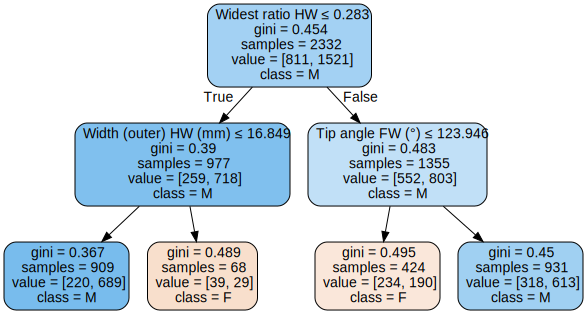

In [ ]:
#Create a visualization for the decision tree
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X_train.columns,
                               class_names=unique(Y_train.values, ''),
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **Step 6:** Test the model

Run this code block to run the other half of our data (the testing dataset) through the model we just trained to find out how accurate it is with new data:

In [ ]:
#Make the prediction using the model
Y_pred = clf.predict(X_test)

print('Percentage accuracy: ', 100*accuracy_score(Y_test, Y_pred))

Percentage accuracy:  62.10887269609944


Our decision tree was more accurate in classifying the testing data than the training data. That's a good sign that we didn't overfit it to the training data.



### **Step 7:** Evaluate the model

Let's evaluate the model